# ***Titanic Dataset Analysis***

In [43]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Dataset Variables**

| Variable | Definition	| Values |
| --- | --- | --- |
| survived \| alive | 	Survivor  | 	[0\|no] = No, [1\|yes] = Yes |
| pclass \| class	| Ticket class | 	1 = [1\|First], 2 = [2\|Second], 3 = [3\|Third]
| sex 	| Sex 	| 'male', 'female' |
| Age |	Age in years 	| |
| sibsp |	# of brothers, husband/wife on board 	| |
| parch |	# of parents/offspring on board 	| |
| fare 	| Ticket fare | |
| embarked |	Embark Harbor |	C = Cherbourg, Q = Queenstown, S = Southampton |
| who |	Man, woman or child | 'man', 'woman', 'child'  |
| adult_male 	| If its elderly | True, False	|
| deck |	 Deck/cabin identification| 'A', 'B', 'C', 'D', 'E', 'F', 'G' |
| alone |	If traveled alone| True, False |

### **Loading the dataset**

In [44]:
titanic_df = sns.load_dataset('titanic')
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### **EDA**

In [45]:
titanic_df_coord = titanic_df.copy()

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [46]:
titanic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [47]:
for col in titanic_df.select_dtypes('number').columns:
    print(f'Kurtosis and assimetry of {col}')
    print(f'Kurtosis: {titanic_df[col].kurt()}, assimetry: {titanic_df[col].skew()}')
    print()

Kurtosis and assimetry of survived
Kurtosis: -1.775004671066304, assimetry: 0.4785234382949897

Kurtosis and assimetry of pclass
Kurtosis: -1.2800149715782825, assimetry: -0.6305479068752845

Kurtosis and assimetry of age
Kurtosis: 0.17827415364210353, assimetry: 0.38910778230082704

Kurtosis and assimetry of sibsp
Kurtosis: 17.880419726645968, assimetry: 3.6953517271630565

Kurtosis and assimetry of parch
Kurtosis: 9.778125179021648, assimetry: 2.7491170471010933

Kurtosis and assimetry of fare
Kurtosis: 33.39814088089868, assimetry: 4.787316519674893



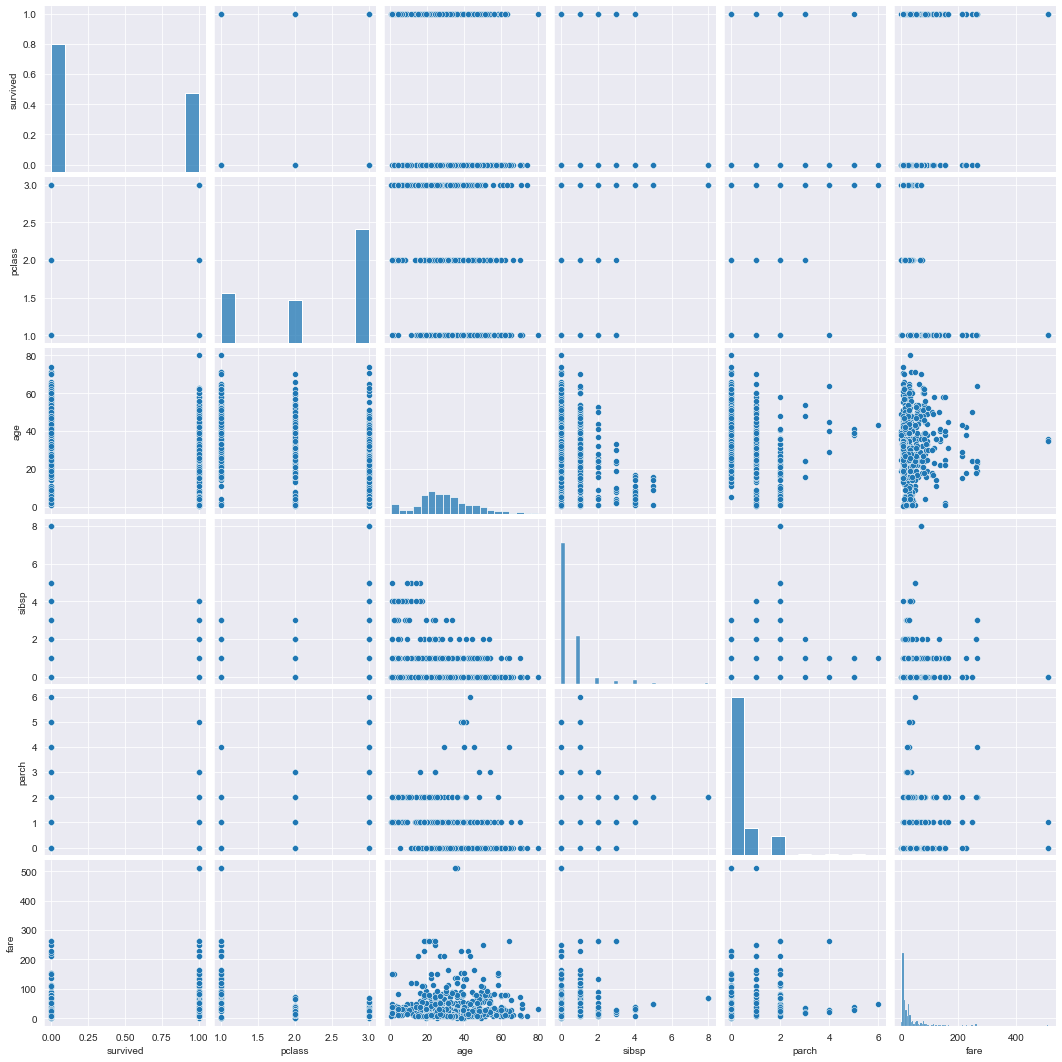

In [48]:
sns.set_style('darkgrid')
sns.pairplot(titanic_df.select_dtypes('number'));

### **Preprocessing**

1. Check for Nulls
2. Check for Out of range values
3. Check for duplicates

#### 1. Nulls

In [49]:
# Null values

titanic_df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [50]:
# Null percentages

titanic_df.isna().sum()/len(titanic_df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

Drop deck due to it having a significant number of missing values (high null percentage). Additionally age has a high standard deviation indicating a wide spread of values, this makes imputing all the values with the mean of the whole column not effective, the best approach is to drop nulls.

In [51]:
titanic_df.drop('deck', axis=1, inplace=True)

In [52]:
titanic_df.dropna(inplace=True)

In [53]:
#Checking Null values

titanic_df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

#### 2. Out of range values

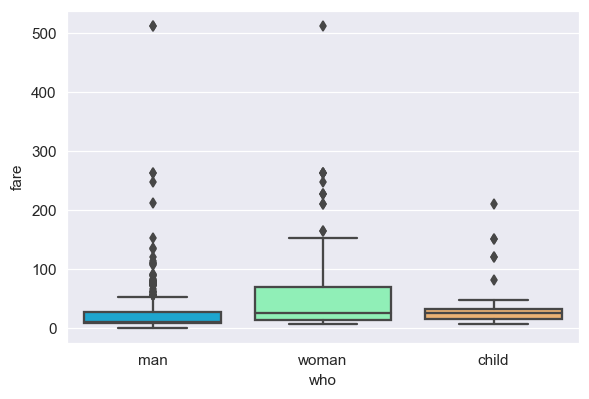

In [54]:
fig, ax = plt.subplots(dpi=110)
sns.set_style('darkgrid')
sns.boxplot(data=titanic_df, x='who', y='fare', palette='rainbow');

Fare is the only variable that is reasonable that it can be out of range, this is because it had the biggest value of all variables in the max column of **`titanic_df.describe()`**, however the results are reasonable.

#### 3. Duplicates

In [55]:
titanic_df.duplicated().sum()

38

In [56]:
titanic_df.drop_duplicates(inplace=True)

In [57]:
titanic_df.duplicated().sum()

0

No duplicates

### **Data analysis**

#### Data correlation

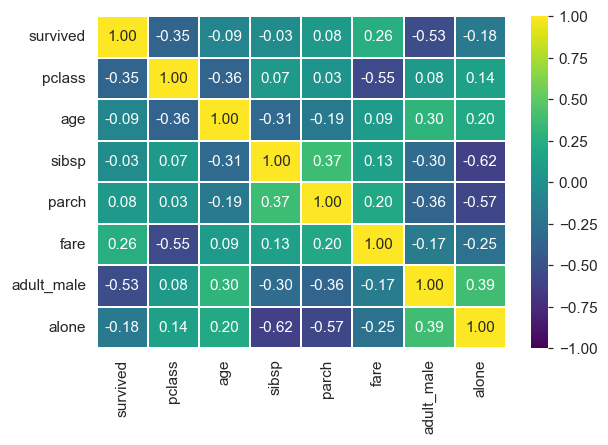

In [83]:
fig, ax = plt.subplots(dpi=110)

sns.heatmap(titanic_df.corr(), cmap='viridis', linecolor='white', linewidths=1, annot= True, fmt='.2f', vmin=-1);

Survived variables shows strong negative correlation with **`adult_male`** and **`pclass`** which means a higher class has more chances of survival, as well as not being elderly.

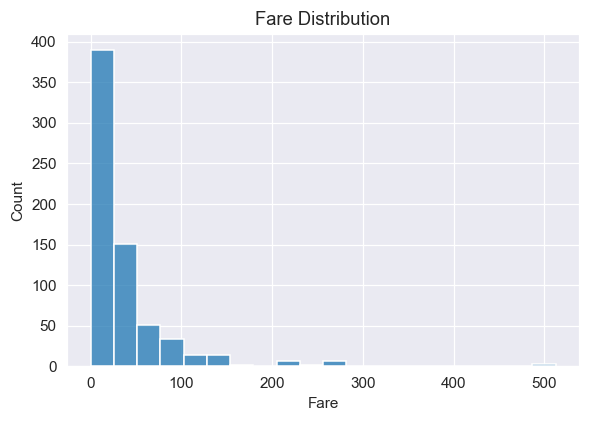

In [59]:
fig, ax = plt.subplots(dpi=110)

dist = sns.histplot(titanic_df['fare'], bins=20)
dist.set_xlabel('Fare')
dist.set_title('Fare Distribution');

Most people had the cheapest fare on board.

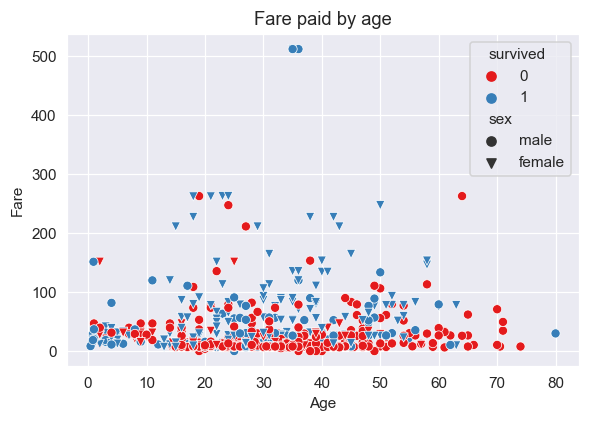

In [60]:
fig, ax = plt.subplots(dpi=110)

ageFare = sns.scatterplot(data=titanic_df, x='age', y='fare', hue='survived', palette='Set1', style='sex', markers=['o', 'v'])
ageFare.set_xlabel('Age')
ageFare.set_ylabel('Fare')
ageFare.set_title('Fare paid by age');

Most passengers paid for the cheapest fares, it can also be seen that most of the passengers who bought the cheapest fares did not survive, and most of them were male. The women on board paid a higher fare and survived.

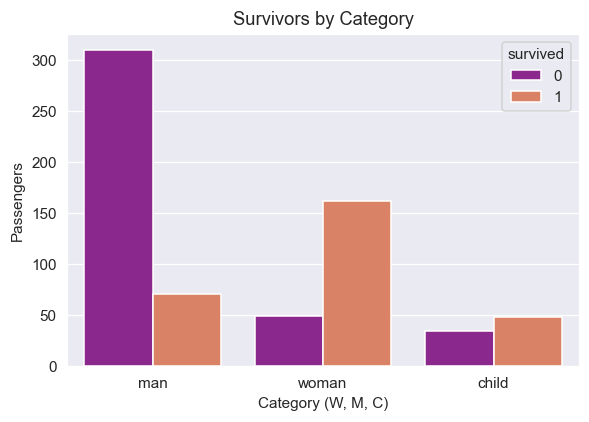

In [61]:
fig, ax = plt.subplots(dpi=110)

count = sns.countplot(data=titanic_df, x='who', hue='survived', palette='plasma')
count.set_xlabel('Category (W, M, C)')
count.set_ylabel('Passengers')
count.set_title('Survivors by Category');

Looking by category most men on board died, contrary to women and children being almost half and half.

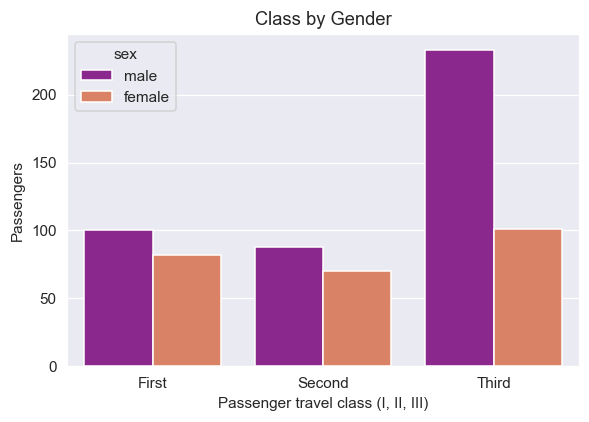

In [62]:
fig, ax = plt.subplots(dpi=110)

clase = sns.countplot(data=titanic_df, x='class', hue='sex', palette='plasma')
clase.set_xlabel("Passenger travel class (I, II, III)")
clase.set_ylabel('Passengers')
clase.set_title('Class by Gender');

Passengers on the lowest class were mostly men, however on the other classes the ratio is almost the same.

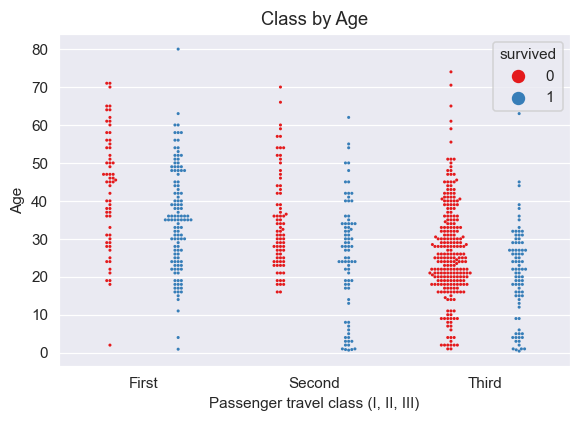

In [63]:
fig, ax = plt.subplots(dpi=110)

claseS = sns.swarmplot(data=titanic_df, x='class', y='age', size=2, hue='survived', dodge=True, palette='Set1')
claseS.set_xlabel("Passenger travel class (I, II, III)")
claseS.set_ylabel('Age')
claseS.set_title('Class by Age');

Most of the third class ticket did not survived, the second class it has a similiar ratio and on first class most of passengers survived.

In [64]:
titanic_df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [65]:
def cord(town):
    if town == 'Southampton':
        coor = '50.89510; -1.395220'
    elif town == 'Cherbourg':
        coor = '49.641331; -1.625517'
    elif town == 'Queenstown':
        coor = '51.851158; -8.293474'
    else:
        coor = 'Unknown'
    return coor

# Apply the cord function to the 'embark_town' column and create a new column 'coordinates'
titanic_df_coord['coordinates'] = titanic_df_coord['embark_town'].apply(cord)

# Drop unnecessary columns
cord_df = titanic_df_coord.drop(columns=['survived','pclass','sex', 'parch','class', 'who', 'adult_male', 'alone', 'alive', 'sibsp', 'fare', 'deck'])
cord_df[['Lat', 'Lon']] = cord_df['coordinates'].str.split('; ', expand=True)
cord_df.drop(columns='coordinates', inplace=True)

# Display a sample of the resulting DataFrame
cord_df.dropna(inplace=True)
cord_df.sample(10)

,age,embarked,embark_town,Lat,Lon
72,21.0,S,Southampton,50.89510,-1.395220
488,30.0,S,Southampton,50.89510,-1.395220
373,22.0,C,Cherbourg,49.641331,-1.625517
239,33.0,S,Southampton,50.89510,-1.395220
355,28.0,S,Southampton,50.89510,-1.395220
529,23.0,S,Southampton,50.89510,-1.395220
199,24.0,S,Southampton,50.89510,-1.395220
546,19.0,S,Southampton,50.89510,-1.395220
714,52.0,S,Southampton,50.89510,-1.395220
556,48.0,C,Cherbourg,49.641331,-1.625517


In [66]:
import folium
from folium.plugins import FastMarkerCluster

In [67]:
london = (51.508825, -0.124780)

map = folium.Map(location=london,   
                      zoom_start=6)

coordenadas = cord_df[['Lat', 'Lon']].values

FastMarkerCluster(name ="Passengers embarked town" ,
                  data= coordenadas).add_to(map)

map

The map displays boarding locations and the number of passengers at each location.

### **Machine Learning**

Prediction on survival of the passengers, this is a supervised learning algorithm.

In [68]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score

In [69]:
X = titanic_df.drop(columns = ['survived', 'alive'])
y = titanic_df['survived']

X_numeric = X.select_dtypes('number').drop(columns='pclass').values
X_categoric = X[['sex', 'embarked', 'pclass', 'who']].values
y = y.values

#### Preprocessing

Numeric values

In [70]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_numeric_scaled = scaler.fit_transform(X_numeric)

In [71]:
for i in range(3):
    print(f"original {X_numeric[i]}")
    print(f'scaled {X_numeric_scaled[i]}')
    print()

original [22.    1.    0.    7.25]
scaled [0.27117366 0.2        0.         0.01415106]

original [38.      1.      0.     71.2833]
scaled [0.4722292  0.2        0.         0.13913574]

original [26.     0.     0.     7.925]
scaled [0.32143755 0.         0.         0.01546857]



Categorical values

In [72]:
scaler_c = preprocessing.OneHotEncoder(sparse=False)
X_categoric_scaled = scaler_c.fit_transform(X_categoric)

In [73]:
for i in range(5):
    print(f"original {X_categoric[i]}")
    print(f'scaled {X_categoric_scaled[i]}')
    print()

original ['male' 'S' 3 'man']
scaled [0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]

original ['female' 'C' 1 'woman']
scaled [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.]

original ['female' 'S' 3 'woman']
scaled [1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.]

original ['female' 'S' 1 'woman']
scaled [1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.]

original ['male' 'S' 3 'man']
scaled [0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]



In [74]:
X_full = np.concatenate((X_numeric_scaled, X_categoric_scaled),
                        axis=1)
print(X_full[0])

[0.27117366 0.2        0.         0.01415106 0.         1.
 0.         0.         1.         0.         0.         1.
 0.         1.         0.        ]


#### Data Partition and training

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.3)       #random_state=42

In [76]:
lmr = linear_model.LogisticRegression()                                              #random_state=42

lmr.fit(X_train, y_train)

LogisticRegression()

#### Accuracy

In [77]:
y_pred = lmr.predict(X_test)

for i in range (5):
    print(f'original: {y_test[i]}, prediction: {y_pred[i]}')

original: 1, prediction: 1
original: 0, prediction: 0
original: 1, prediction: 0
original: 1, prediction: 1
original: 0, prediction: 0


In [78]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy = {acc}')
print(f'Error = {1-acc}')

Accuracy = 0.7931034482758621
Error = 0.2068965517241379


In [79]:
prediction_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
melted_df = pd.melt(prediction_df, value_vars=['y_test', 'y_pred'], var_name='Type', value_name='Value')

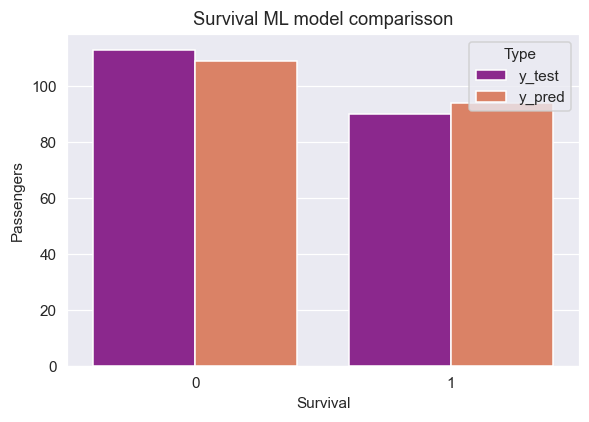

In [80]:
plt.figure(dpi=110)
predict = sns.countplot(data=melted_df, x='Value', hue='Type', palette='plasma')
predict.set_xlabel("Survival")
predict.set_ylabel('Passengers')
predict.set_title('Survival ML model comparisson');